In [1]:
import numpy as np
import scipy.integrate as it
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,r'C:\Users\mdk\Documents\Python Scripts\MNKappa')

import area as area

In [2]:
#general settings
interval = 0.1

# soortelijke massa beton
gam_c = 24 #kN/m³

#parameters girder
cs1 = area.Cross_section('test', [[0,0],[400,0],[400,1000],[0,1000]])
A = cs1.area*1e-6 #cross section area
h = cs1.height/1000 #m

L = 10
L_x = np.arange(0,L+interval,interval)

# reinforcement
A_strands = 50 #mm²
sigp_0 = 1235 #MPa
sigp_inf = 0.8*sigp_0 #MPa

reinf_strait = [[8*A_strands,h-0.04],[6*A_strands,h-0.08],[2*A_strands,h-0.115]] #vsp in rechte lijn [Ap,d]
ep_strait = [i[1]-h/2 for i in reinf_strait]

In [41]:
#loads
# Pm_strait = np.asarray([i[0]*sigp_inf * -10**-3 for i in reinf_strait])

qg = gam_c*A

# pointload
a_f = L/4
b_f = L-a_f
F = 700

#moments acting on girder
# M = 0.5 * (qg) * L_x * (L - L_x)
M = np.where(L_x<=a_f,F*b_f/L*L_x,(F*b_f/L*(a_f+interval)-F*a_f/L*(L_x-a_f)))

#shear acting on girder
V = np.gradient(M,L_x)

In [42]:
#plot variables
z = cs1.width_at_z()[::-1,1]-cs1.center_of_gravity

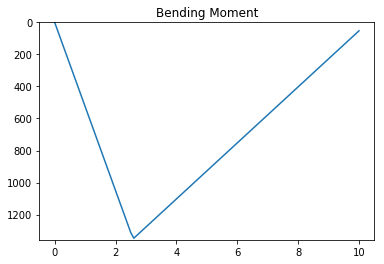

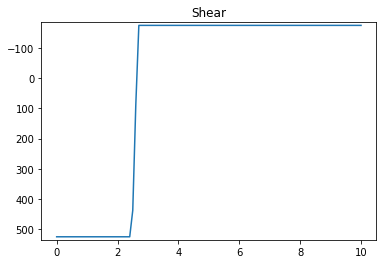

In [43]:
plt.title('Bending Moment')
plt.plot(L_x,M)
plt.ylim(M.max()+10,0)
plt.show()

plt.title('Shear')
plt.plot(L_x,V)
plt.ylim(V.max()+10,V.min()-10)
plt.show()

ultimate stress based on math: sig = M/w = 20.212500000000002 MPa
difference is  0.000872262066291917 %


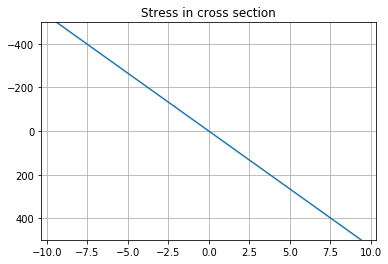

ultimate stress based on math: tau = (V*S)/(b*I) = 1.9687500000000002 MPa
difference is  5.625140628515714e-27 %


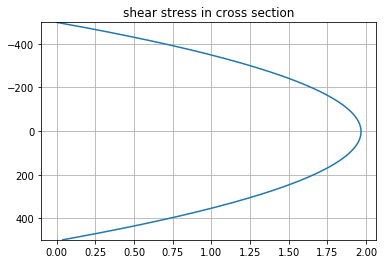

In [45]:
# verification of script (middle section)
sig_bend = np.outer(cs1.sig_bend_unit()[:,0], M*1e6)

print('ultimate stress based on math: sig = M/w =', M.max()*1e6/(1/6*400*1000**2), 'MPa')
print('difference is ', sig_bend[:,-1].max()/M.max()*1e6/(1/6*400*1000**2)*100, '%')
plt.title('Stress in cross section')
plt.plot(sig_bend[:,12], z)
plt.ylim(z.max(),z.min())
plt.grid(True)
plt.show()

tau = np.outer(cs1.tau_unit()[:,0], V*1e3)

print('ultimate stress based on math: tau = (V*S)/(b*I) =', (V[0]*1e3 * 0.5*400*500**2)/(1/12*400*1000**3*400), 'MPa')
print('difference is ', tau[:,0].max()/(V[0]*1e3 * 0.5*400*500**2)/(1/12*400*1000**3*400), '%')
plt.title('shear stress in cross section')
plt.plot(tau[:,12], z)
plt.ylim(z.max(),z.min())
plt.grid(True)
plt.show()

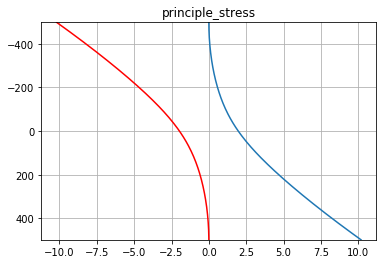

In [47]:
prin_stress = area.principle_stress_section(sig_bend[:,1:-1],tau[:,1:-1])

plt.title('principle_stress')
plt.plot(prin_stress[0][:,12], z)
plt.plot(prin_stress[1][:,12], z, 'r')
plt.ylim(z.max(),z.min())
plt.grid(True)
plt.show()